In [1]:
!pip install Roboflow
!pip install ultralytics
import cv2
import glob
import numpy as np # biblioteca com funções matemáticas
from imutils import contours # para ordenar contornos
from google.colab.patches import cv2_imshow # visualização de imagens
import os
from roboflow import Roboflow
from ultralytics import YOLO
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

rf = Roboflow(api_key="9M9eZwZT2EXz4Lmw2SsQ")
project = rf.workspace("utad-dqdey").project("licence-plates-identification")
dataset = project.version(4).download("yolov8")

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 8.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.10, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Licence-plates-identification-4 in yolov8:: 100%|██████████| 724/724 [00:00<00:00, 5232.45it/s]


Mounted at /content/drive


In [2]:
model_best = YOLO("/content/pdi_best.pt")
test = model_best.predict(source = "/content/Licence-plates-identification-4/test/images", conf = 0.75, save = True, save_txt = True)



image 1/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-47-53_jpeg.rf.a61cf1c6ac05ac02b69416c266ef0527.jpg: 640x640 1 licence-plates, 10.8ms
image 2/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-47-54_jpeg.rf.e404dea4b70ea57f928b1cfdfa2d8113.jpg: 640x640 1 licence-plates, 12.4ms
image 3/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-48-06-1-_jpeg.rf.86746a3ba8b7132d28c1436fc63ae4af.jpg: 640x640 1 licence-plates, 7.5ms
image 4/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-48-32-1-_jpeg.rf.68e307fb8e0011a2d5f9b128e71bd0db.jpg: 640x640 1 licence-plates, 8.0ms
image 5/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-at-21-48-35_jpeg.rf.b3be5161f6e94667faebe6fab34a43d6.jpg: 640x640 1 licence-plates, 7.5ms
image 6/15 /content/Licence-plates-identification-4/test/images/WhatsApp-Image-2023-11-26-a

In [3]:
dir_labels = "/content/runs/detect/predict/labels/*.txt"
dir_images = "/content/runs/detect/predict/*.jpg"

label_paths = []

for label in sorted(glob.iglob(dir_labels)):
  label_paths.append(label)

label_paths

['/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-47-53_jpeg.rf.a61cf1c6ac05ac02b69416c266ef0527.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-47-54_jpeg.rf.e404dea4b70ea57f928b1cfdfa2d8113.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-48-06-1-_jpeg.rf.86746a3ba8b7132d28c1436fc63ae4af.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-48-32-1-_jpeg.rf.68e307fb8e0011a2d5f9b128e71bd0db.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-48-35_jpeg.rf.b3be5161f6e94667faebe6fab34a43d6.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-49-16-1-_jpeg.rf.2b705f409c3604ef561f3d871cf50d2a.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-49-20-1-_jpeg.rf.d31817b953f9b594738887b0edf1ee02.txt',
 '/content/runs/detect/predict/labels/WhatsApp-Image-2023-11-26-at-21-49-24-1-_jpeg.rf.2a83bb90bebb3b3fcae3982ded0d0990.txt',
 

In [4]:
label_names = []

for path in label_paths:
  split_path = path.split("/")
  path_name = split_path[-1]
  path_name = path_name.replace(".txt", "")

  label_names.append(path_name)

label_names

['WhatsApp-Image-2023-11-26-at-21-47-53_jpeg.rf.a61cf1c6ac05ac02b69416c266ef0527',
 'WhatsApp-Image-2023-11-26-at-21-47-54_jpeg.rf.e404dea4b70ea57f928b1cfdfa2d8113',
 'WhatsApp-Image-2023-11-26-at-21-48-06-1-_jpeg.rf.86746a3ba8b7132d28c1436fc63ae4af',
 'WhatsApp-Image-2023-11-26-at-21-48-32-1-_jpeg.rf.68e307fb8e0011a2d5f9b128e71bd0db',
 'WhatsApp-Image-2023-11-26-at-21-48-35_jpeg.rf.b3be5161f6e94667faebe6fab34a43d6',
 'WhatsApp-Image-2023-11-26-at-21-49-16-1-_jpeg.rf.2b705f409c3604ef561f3d871cf50d2a',
 'WhatsApp-Image-2023-11-26-at-21-49-20-1-_jpeg.rf.d31817b953f9b594738887b0edf1ee02',
 'WhatsApp-Image-2023-11-26-at-21-49-24-1-_jpeg.rf.2a83bb90bebb3b3fcae3982ded0d0990',
 'WhatsApp-Image-2023-11-26-at-21-49-31_jpeg.rf.755d6c7190b5dbfb90ff8d096bddf823',
 'WhatsApp-Image-2023-11-26-at-21-49-38_jpeg.rf.29867753d9c3f3e99bc55a5b0c43ea2c',
 'WhatsApp-Image-2023-11-26-at-21-49-54_jpeg.rf.dfd47ae45c7410af5c5646da0a344586',
 'WhatsApp-Image-2023-11-26-at-21-49-58_jpeg.rf.5ca16dc21b6172c0e32964f4

In [5]:
image_paths = []

for image in sorted(glob.iglob(dir_images)):
  image_paths.append(image)

image_paths

['/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-47-53_jpeg.rf.a61cf1c6ac05ac02b69416c266ef0527.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-47-54_jpeg.rf.e404dea4b70ea57f928b1cfdfa2d8113.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-48-06-1-_jpeg.rf.86746a3ba8b7132d28c1436fc63ae4af.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-48-32-1-_jpeg.rf.68e307fb8e0011a2d5f9b128e71bd0db.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-48-35_jpeg.rf.b3be5161f6e94667faebe6fab34a43d6.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-49-16-1-_jpeg.rf.2b705f409c3604ef561f3d871cf50d2a.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-49-20-1-_jpeg.rf.d31817b953f9b594738887b0edf1ee02.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-at-21-49-24-1-_jpeg.rf.2a83bb90bebb3b3fcae3982ded0d0990.jpg',
 '/content/runs/detect/predict/WhatsApp-Image-2023-11-26-

In [6]:
images_names = []

for image in image_paths:
  split_image_name = image.split("/")
  image_name = split_image_name[-1]
  image_name = image_name.replace(".jpg", "")

  images_names.append(image_name)

images_names

['WhatsApp-Image-2023-11-26-at-21-47-53_jpeg.rf.a61cf1c6ac05ac02b69416c266ef0527',
 'WhatsApp-Image-2023-11-26-at-21-47-54_jpeg.rf.e404dea4b70ea57f928b1cfdfa2d8113',
 'WhatsApp-Image-2023-11-26-at-21-48-06-1-_jpeg.rf.86746a3ba8b7132d28c1436fc63ae4af',
 'WhatsApp-Image-2023-11-26-at-21-48-32-1-_jpeg.rf.68e307fb8e0011a2d5f9b128e71bd0db',
 'WhatsApp-Image-2023-11-26-at-21-48-35_jpeg.rf.b3be5161f6e94667faebe6fab34a43d6',
 'WhatsApp-Image-2023-11-26-at-21-49-16-1-_jpeg.rf.2b705f409c3604ef561f3d871cf50d2a',
 'WhatsApp-Image-2023-11-26-at-21-49-20-1-_jpeg.rf.d31817b953f9b594738887b0edf1ee02',
 'WhatsApp-Image-2023-11-26-at-21-49-24-1-_jpeg.rf.2a83bb90bebb3b3fcae3982ded0d0990',
 'WhatsApp-Image-2023-11-26-at-21-49-31_jpeg.rf.755d6c7190b5dbfb90ff8d096bddf823',
 'WhatsApp-Image-2023-11-26-at-21-49-38_jpeg.rf.29867753d9c3f3e99bc55a5b0c43ea2c',
 'WhatsApp-Image-2023-11-26-at-21-49-54_jpeg.rf.dfd47ae45c7410af5c5646da0a344586',
 'WhatsApp-Image-2023-11-26-at-21-49-58_jpeg.rf.5ca16dc21b6172c0e32964f4

In [7]:
counter_images = 0
counter_labels = 0

for i in range(0, len(image_paths)):

  if images_names[i] in label_names:

    img = cv2.imread(image_paths[i])

    height = img.shape[0]
    width = img.shape[1]

    f = open(label_paths[counter_labels])

    lines = f.readlines()

    for line in lines:
      l = line.replace("\n", "")

      l_split = l.split(" ")

      coords = [float(l_split[1]), float(l_split[2]), float(l_split[3]), float(l_split[4])]

      des_x = coords[0] * width
      des_y = coords[1] * height
      des_width = coords[2] * width
      des_height = coords[3] * height

      box_thick = 4

      x_min = des_x - des_width / 2 + box_thick
      x_max = des_x + des_width - des_width / 2 - box_thick
      y_min = des_y - des_height + des_height / 2 + box_thick
      y_max = des_y + des_height - des_height / 2 - box_thick

      img_crop = img[int(y_min) : int (y_max), int(x_min) : int(x_max)]

      if not os.path.exists("/content/final_images/"):
        os.makedirs("/content/final_images/")
        print("folder created")

      cv2.imwrite("/content/final_images/"+ str(counter_images) + ".jpg", img_crop)
      counter_images = counter_images + 1

  f.close()

  counter_labels = counter_labels + 1


folder created


In [8]:
dir_final_images = "/content/final_images/*.jpg"
final_image_paths = []

for image in sorted(glob.iglob(dir_final_images)):
  final_image_paths.append(image)

final_image_paths

['/content/final_images/0.jpg',
 '/content/final_images/1.jpg',
 '/content/final_images/10.jpg',
 '/content/final_images/11.jpg',
 '/content/final_images/12.jpg',
 '/content/final_images/13.jpg',
 '/content/final_images/14.jpg',
 '/content/final_images/2.jpg',
 '/content/final_images/3.jpg',
 '/content/final_images/4.jpg',
 '/content/final_images/5.jpg',
 '/content/final_images/6.jpg',
 '/content/final_images/7.jpg',
 '/content/final_images/8.jpg',
 '/content/final_images/9.jpg']

--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


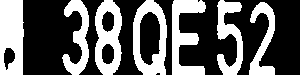

folder created
num whites 341
num whites 167


num whites 232


num whites 186


num whites 188


num whites 174


num whites 151


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


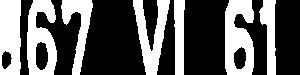

num whites 344
num whites 237


num whites 152


num whites 167


num whites 304
num whites 283
num whites 214


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


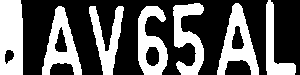

num whites 367
num whites 167


num whites 152


num whites 207


num whites 179


num whites 157


num whites 139


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


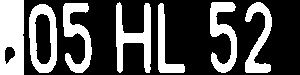

num whites 366
num whites 188


num whites 168


num whites 161


num whites 126


num whites 189


num whites 158


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


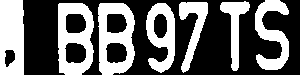

num whites 359
num whites 232


num whites 225


num whites 202


num whites 148


num whites 129


num whites 179


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


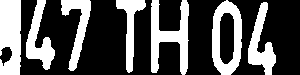

num whites 348
num whites 160


num whites 137


num whites 123


num whites 169


num whites 197


num whites 164


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


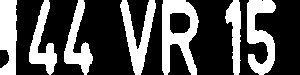

num whites 325
num whites 154


num whites 145


num whites 150


num whites 205


num whites 201


num whites 203


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


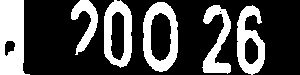

num whites 295
num whites 148


num whites 200


num whites 179


num whites 163


num whites 195


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


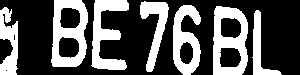

num whites 228


num whites 212


num whites 176


num whites 157


num whites 214


num whites 217


num whites 112


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


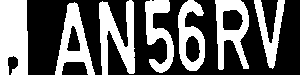

num whites 361
num whites 145


num whites 196


num whites 169


num whites 189


num whites 187


num whites 133


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


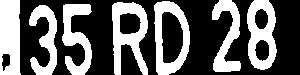

num whites 343
num whites 181


num whites 191


num whites 196


num whites 176


num whites 177


num whites 215


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


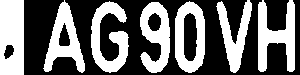

num whites 374
num whites 146


num whites 175


num whites 220


num whites 222


num whites 150


num whites 217


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


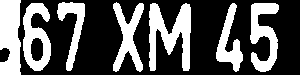

num whites 344
num whites 210


num whites 138


num whites 157


num whites 196


num whites 148


num whites 195


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


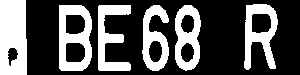

num whites 362
num whites 233


num whites 195


num whites 201


num whites 221


num whites 179


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


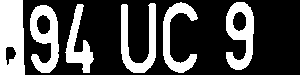

num whites 341
num whites 203


num whites 138


num whites 170


num whites 136


num whites 207


In [9]:
crop_num = 0

for image in final_image_paths:
  img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (300, 75))
  th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  _, labels = cv2.connectedComponents(th)

  mask = np.zeros(th.shape, dtype = 'uint8')

  total_pixels = th.shape[0] * th.shape[1]
  min = total_pixels // 40
  max = total_pixels // 10

  for (j, label) in enumerate(np.unique(labels)):
    if label == 0:
      continue

    label_mask = np.zeros(th.shape, dtype = 'uint8')
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)

    #    cv2_imshow(label_mask)

    if num_pixels > min and num_pixels < max:
      mask = cv2.add(mask, label_mask)
    print("--------------------------------------")
  cv2_imshow(mask)

  cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  (cnts, _) = contours.sort_contours(cnts, method = "left-to-right")

  ep = 0

  if not os.path.exists("/content/masks/"):
        os.makedirs("/content/masks/")
        print("folder created")

  for rect in cnts:
    x, y, w, h = cv2.boundingRect(rect)

    if 10 < w < 100 and h < 80:
      crop = mask[y - ep:y + h + ep, x - ep: x + w + ep]
      if crop.shape[0] > 0:
        if crop.shape[1] > 0:
          resized_crop = cv2.resize(crop, (20, 20))

          lines = resized_crop.shape[0]
          columns = resized_crop.shape[1]
          num_whites = 0

          for line in range(lines):
            for column in range(columns):
              if resized_crop[line, column] == 255:
                num_whites += 1
              else:
                continue

          print("num whites", num_whites)
          if num_whites / (lines * columns) > 0.70:
            continue
          else:
            cv2_imshow(resized_crop)

            path = r"/content/masks/"
            cv2.imwrite(path + str(crop_num) + ".jpg", resized_crop)
            crop_num += 1






In [10]:
input_shape = (20, 20, 3) # input que o modelo aceita
num_classes = 34 # número de classes

model_classification = keras.Sequential(
    [
        layers.Dense(32, input_shape = input_shape),
        layers.Dense(64, activation = 'relu'),
        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)


In [11]:
model_classification.build(input_shape)
model_classification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20, 20, 32)        128       
                                                                 
 dense_1 (Dense)             (None, 20, 20, 64)        2112      
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense_2 (Dense)             (None, 34)                870434    
                                                                 
Total params: 872674 (3.33 MB)
Trainable params: 872674 (3.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
weight_path = "/content/best_weights.h5"

model_classification.load_weights(weight_path)

In [13]:
dir_masks = "/content/masks/*.jpg"
masks_paths = []

for image in sorted(glob.iglob(dir_masks)):
  masks_paths.append(image)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
              'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
              'U', 'V', 'W', 'X', 'Y', 'Z'] # nomes das classes -> não existe classe para a letra "O" e a letra "I"

for image in masks_paths:

  mask =  cv2.imread(image)
  cv2_imshow(mask)

  mask = np.expand_dims(mask, axis = 0)

  predict = model_classification.predict(mask)
  class_index = np.argmax(predict)
  print(classes[class_index])
  #cls = classes[np.argmax(predict)]



1/1 [==============================] - 1s 878ms/step
B


1/1 [==============================] - 0s 20ms/step
B


1/1 [==============================] - 0s 20ms/step
A


1/1 [==============================] - 0s 20ms/step
V


1/1 [==============================] - 0s 20ms/step
E


1/1 [==============================] - 0s 20ms/step
5


1/1 [==============================] - 0s 20ms/step
A


1/1 [==============================] - 0s 28ms/step
L


1/1 [==============================] - 0s 20ms/step
E


1/1 [==============================] - 0s 22ms/step
5


1/1 [==============================] - 0s 20ms/step
M


1/1 [==============================] - 0s 20ms/step
L


1/1 [==============================] - 0s 19ms/step
D


1/1 [==============================] - 0s 19ms/step
5


1/1 [==============================] - 0s 27ms/step
2


1/1 [==============================] - 0s 21ms/step
E


1/1 [==============================] - 0s 20ms/step
E


1/1 [==============================] - 0s 20ms/step
B


1/1 [==============================] - 0s 90ms/step
7


1/1 [==============================] - 0s 31ms/step
T


1/1 [==============================] - 0s 103ms/step
E


1/1 [==============================] - 0s 79ms/step
4


1/1 [==============================] - 0s 156ms/step
7


1/1 [==============================] - 0s 126ms/step
E


1/1 [==============================] - 0s 118ms/step
T


1/1 [==============================] - 0s 117ms/step
M


1/1 [==============================] - 0s 135ms/step
D


1/1 [==============================] - 0s 122ms/step
4


1/1 [==============================] - 0s 82ms/step
4


1/1 [==============================] - 0s 72ms/step
4


1/1 [==============================] - 0s 69ms/step
V


1/1 [==============================] - 0s 70ms/step
R


1/1 [==============================] - 0s 84ms/step
1


1/1 [==============================] - 0s 78ms/step
5


1/1 [==============================] - 0s 72ms/step
5


1/1 [==============================] - 0s 34ms/step
7


1/1 [==============================] - 0s 38ms/step
0


1/1 [==============================] - 0s 34ms/step
D


1/1 [==============================] - 0s 56ms/step
2


1/1 [==============================] - 0s 35ms/step
E


1/1 [==============================] - 0s 34ms/step
9


1/1 [==============================] - 0s 51ms/step
B


1/1 [==============================] - 0s 40ms/step
E


1/1 [==============================] - 0s 30ms/step
7


1/1 [==============================] - 0s 37ms/step
E


1/1 [==============================] - 0s 37ms/step
2


1/1 [==============================] - 0s 32ms/step
E


1/1 [==============================] - 0s 35ms/step
L


1/1 [==============================] - 0s 43ms/step
A


1/1 [==============================] - 0s 29ms/step
M


1/1 [==============================] - 0s 36ms/step
5


1/1 [==============================] - 0s 30ms/step
E


1/1 [==============================] - 0s 55ms/step
R


1/1 [==============================] - 0s 38ms/step
V


1/1 [==============================] - 0s 46ms/step
9


1/1 [==============================] - 0s 65ms/step
5


1/1 [==============================] - 0s 31ms/step
E


1/1 [==============================] - 0s 31ms/step
R


1/1 [==============================] - 0s 88ms/step
D


1/1 [==============================] - 0s 52ms/step
2


1/1 [==============================] - 0s 34ms/step
B


1/1 [==============================] - 0s 34ms/step
A


1/1 [==============================] - 0s 120ms/step
G


1/1 [==============================] - 0s 42ms/step
9


1/1 [==============================] - 0s 43ms/step
0


1/1 [==============================] - 0s 52ms/step
V


1/1 [==============================] - 0s 74ms/step
M


1/1 [==============================] - 0s 40ms/step
7


1/1 [==============================] - 0s 37ms/step
5


1/1 [==============================] - 0s 38ms/step
7


1/1 [==============================] - 0s 32ms/step
X


1/1 [==============================] - 0s 40ms/step
M


1/1 [==============================] - 0s 39ms/step
4


1/1 [==============================] - 0s 61ms/step
5


1/1 [==============================] - 0s 33ms/step
E


1/1 [==============================] - 0s 58ms/step
E


1/1 [==============================] - 0s 35ms/step
E


1/1 [==============================] - 0s 30ms/step
B


1/1 [==============================] - 0s 33ms/step
V


1/1 [==============================] - 0s 53ms/step
R


1/1 [==============================] - 0s 38ms/step
9


1/1 [==============================] - 0s 36ms/step
4


1/1 [==============================] - 0s 31ms/step
U


1/1 [==============================] - 0s 51ms/step
E


1/1 [==============================] - 0s 51ms/step
9


1/1 [==============================] - 0s 37ms/step
1


In [14]:
dir_test = "/content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/*"
test_paths = []

for image in sorted(glob.iglob(dir_test)):
  test_paths.append(image)

model_best = YOLO("/content/pdi_best.pt")
test = model_best.predict(source = dir_test, conf = 0.75, save = True, save_txt = True)



image 1/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro0.png: 448x640 (no detections), 134.9ms
image 2/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro1.png: 640x640 1 licence-plates, 85.0ms
image 3/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro10.png: 640x480 1 licence-plates, 320.7ms
image 4/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro100.png: 480x640 1 licence-plates, 94.8ms
image 5/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro101.png: 640x480 1 licence-plates, 16.5ms
image 6/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro102.png: 640x480 1 licence-plates, 9.7ms
image 7/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_Class main imagens_inferencia/carro103.png: 640x640 1 licence-plates, 10.5ms
image 8/150 /content/drive/MyDrive/PDI20 Exemplos_Det_Seg_C

In [15]:
dir_labels = "/content/runs/detect/predict2/labels/*.txt"
dir_images = "/content/runs/detect/predict2/*.png"

label_paths = []

for label in sorted(glob.iglob(dir_labels)):
  label_paths.append(label)
label_paths

['/content/runs/detect/predict2/labels/carro1.txt',
 '/content/runs/detect/predict2/labels/carro10.txt',
 '/content/runs/detect/predict2/labels/carro100.txt',
 '/content/runs/detect/predict2/labels/carro101.txt',
 '/content/runs/detect/predict2/labels/carro102.txt',
 '/content/runs/detect/predict2/labels/carro103.txt',
 '/content/runs/detect/predict2/labels/carro104.txt',
 '/content/runs/detect/predict2/labels/carro105.txt',
 '/content/runs/detect/predict2/labels/carro106.txt',
 '/content/runs/detect/predict2/labels/carro107.txt',
 '/content/runs/detect/predict2/labels/carro108.txt',
 '/content/runs/detect/predict2/labels/carro109.txt',
 '/content/runs/detect/predict2/labels/carro11.txt',
 '/content/runs/detect/predict2/labels/carro110.txt',
 '/content/runs/detect/predict2/labels/carro111.txt',
 '/content/runs/detect/predict2/labels/carro112.txt',
 '/content/runs/detect/predict2/labels/carro113.txt',
 '/content/runs/detect/predict2/labels/carro114.txt',
 '/content/runs/detect/predict2/

In [16]:
label_names = []

for path in label_paths:
  split_path = path.split("/")
  path_name = split_path[-1]
  path_name = path_name.replace(".txt", "")
  label_names.append(path_name)
label_names

['carro1',
 'carro10',
 'carro100',
 'carro101',
 'carro102',
 'carro103',
 'carro104',
 'carro105',
 'carro106',
 'carro107',
 'carro108',
 'carro109',
 'carro11',
 'carro110',
 'carro111',
 'carro112',
 'carro113',
 'carro114',
 'carro115',
 'carro116',
 'carro117',
 'carro118',
 'carro119',
 'carro12',
 'carro120',
 'carro121',
 'carro122',
 'carro123',
 'carro124',
 'carro125',
 'carro126',
 'carro127',
 'carro128',
 'carro129',
 'carro13',
 'carro130',
 'carro131',
 'carro132',
 'carro133',
 'carro134',
 'carro135',
 'carro136',
 'carro137',
 'carro138',
 'carro139',
 'carro14',
 'carro140',
 'carro141',
 'carro142',
 'carro143',
 'carro144',
 'carro145',
 'carro146',
 'carro147',
 'carro148',
 'carro149',
 'carro15',
 'carro150',
 'carro16',
 'carro17',
 'carro18',
 'carro19',
 'carro2',
 'carro20',
 'carro21',
 'carro22',
 'carro23',
 'carro24',
 'carro25',
 'carro26',
 'carro27',
 'carro28',
 'carro29',
 'carro3',
 'carro30',
 'carro31',
 'carro32',
 'carro33',
 'carro34',
 'ca

In [17]:
image_paths = []

for image in sorted(glob.iglob(dir_images)):
  image_paths.append(image)
image_paths

['/content/runs/detect/predict2/carro0.png',
 '/content/runs/detect/predict2/carro1.png',
 '/content/runs/detect/predict2/carro10.png',
 '/content/runs/detect/predict2/carro100.png',
 '/content/runs/detect/predict2/carro101.png',
 '/content/runs/detect/predict2/carro102.png',
 '/content/runs/detect/predict2/carro103.png',
 '/content/runs/detect/predict2/carro104.png',
 '/content/runs/detect/predict2/carro105.png',
 '/content/runs/detect/predict2/carro106.png',
 '/content/runs/detect/predict2/carro107.png',
 '/content/runs/detect/predict2/carro108.png',
 '/content/runs/detect/predict2/carro109.png',
 '/content/runs/detect/predict2/carro11.png',
 '/content/runs/detect/predict2/carro110.png',
 '/content/runs/detect/predict2/carro111.png',
 '/content/runs/detect/predict2/carro112.png',
 '/content/runs/detect/predict2/carro113.png',
 '/content/runs/detect/predict2/carro114.png',
 '/content/runs/detect/predict2/carro115.png',
 '/content/runs/detect/predict2/carro116.png',
 '/content/runs/det

In [18]:
images_names = []

for image in image_paths:
  split_image_name = image.split("/")
  image_name = split_image_name[-1]
  image_name = image_name.replace(".png", "")
  images_names.append(image_name)
images_names

['carro0',
 'carro1',
 'carro10',
 'carro100',
 'carro101',
 'carro102',
 'carro103',
 'carro104',
 'carro105',
 'carro106',
 'carro107',
 'carro108',
 'carro109',
 'carro11',
 'carro110',
 'carro111',
 'carro112',
 'carro113',
 'carro114',
 'carro115',
 'carro116',
 'carro117',
 'carro118',
 'carro119',
 'carro12',
 'carro120',
 'carro121',
 'carro122',
 'carro123',
 'carro124',
 'carro125',
 'carro126',
 'carro127',
 'carro128',
 'carro129',
 'carro13',
 'carro130',
 'carro131',
 'carro132',
 'carro133',
 'carro134',
 'carro135',
 'carro136',
 'carro137',
 'carro138',
 'carro139',
 'carro14',
 'carro140',
 'carro141',
 'carro142',
 'carro143',
 'carro144',
 'carro145',
 'carro146',
 'carro147',
 'carro148',
 'carro149',
 'carro15',
 'carro150',
 'carro16',
 'carro17',
 'carro18',
 'carro19',
 'carro2',
 'carro20',
 'carro21',
 'carro22',
 'carro23',
 'carro24',
 'carro25',
 'carro26',
 'carro27',
 'carro28',
 'carro29',
 'carro3',
 'carro30',
 'carro31',
 'carro32',
 'carro33',
 'car

In [19]:
counter_images = 0
counter = 0
counter_labels = 0

if not os.path.exists("/content/final_test_plates//"):
        os.makedirs("/content/final_test_plates//")
        print("folder created")


for i in range(0, len(image_paths)):
  #print(images_names[i])

  if images_names[i] in label_names:
    print(images_names[i])

    img = cv2.imread(image_paths[i])

    height = img.shape[0]
    width = img.shape[1]

    f = open(label_paths[counter_labels])

    lines = f.readlines()

    for line in lines:
      l = line.replace("\n", "")
      l_split = l.split(" ")

      coords = [float(l_split[1]), float(l_split[2]), float(l_split[3]), float(l_split[4])]

      des_x = coords[0] * width
      des_y = coords[1] * height
      des_width = coords[2] * width
      des_height = coords[3] * height

      bb_thickness = 4

      x_min = des_x - des_width + des_width / 2 + bb_thickness
      x_max = des_x + des_width - des_width / 2 - bb_thickness
      y_min = des_y - des_height + des_height / 2 + bb_thickness
      y_max = des_y + des_height  - des_height / 2 - bb_thickness

      img_crop = img[int(y_min) : int(y_max), int(x_min) : int(x_max)]
      img_crop = cv2.resize(img_crop, (300, 75))

      cv2.imwrite("/content/final_test_plates/" + str(counter) + ".png", img_crop)
      counter = counter + 1

    f.close()
    counter_labels += 1


folder created
carro1
carro10
carro100
carro101
carro102
carro103
carro104
carro105
carro106
carro107
carro108
carro109
carro11
carro110
carro111
carro112
carro113
carro114
carro115
carro116
carro117
carro118
carro119
carro12
carro120
carro121
carro122
carro123
carro124
carro125
carro126
carro127
carro128
carro129
carro13
carro130
carro131
carro132
carro133
carro134
carro135
carro136
carro137
carro138
carro139
carro14
carro140
carro141
carro142
carro143
carro144
carro145
carro146
carro147
carro148
carro149
carro15
carro150
carro16
carro17
carro18
carro19
carro2
carro20
carro21
carro22
carro23
carro24
carro25
carro26
carro27
carro28
carro29
carro3
carro30
carro31
carro32
carro33
carro34
carro35
carro36
carro37
carro38
carro39
carro4
carro40
carro41
carro42
carro43
carro44
carro45
carro46
carro47
carro48
carro49
carro5
carro50
carro52
carro53
carro54
carro55
carro56
carro57
carro59
carro6
carro62
carro63
carro64
carro65
carro66
carro67
carro68
carro69
carro7
carro70
carro71
carro72
carro

In [20]:
dir_plates = "/content/final_test_plates/*.png"

plates_paths = []

for image in sorted(glob.iglob(dir_plates)):
  plates_paths.append(image)
plates_paths

['/content/final_test_plates/0.png',
 '/content/final_test_plates/1.png',
 '/content/final_test_plates/10.png',
 '/content/final_test_plates/100.png',
 '/content/final_test_plates/101.png',
 '/content/final_test_plates/102.png',
 '/content/final_test_plates/103.png',
 '/content/final_test_plates/104.png',
 '/content/final_test_plates/105.png',
 '/content/final_test_plates/106.png',
 '/content/final_test_plates/107.png',
 '/content/final_test_plates/108.png',
 '/content/final_test_plates/109.png',
 '/content/final_test_plates/11.png',
 '/content/final_test_plates/110.png',
 '/content/final_test_plates/111.png',
 '/content/final_test_plates/112.png',
 '/content/final_test_plates/113.png',
 '/content/final_test_plates/114.png',
 '/content/final_test_plates/115.png',
 '/content/final_test_plates/116.png',
 '/content/final_test_plates/117.png',
 '/content/final_test_plates/118.png',
 '/content/final_test_plates/119.png',
 '/content/final_test_plates/12.png',
 '/content/final_test_plates/120

In [49]:
if not os.path.exists("/content/masks_tests/"):
      os.makedirs("/content/masks_tests/")
      print("folder created")

img_count = 0

for image in plates_paths:
  os.makedirs("/content/masks_tests/" + str(img_count))
  img_count += 1

FileExistsError: [Errno 17] File exists: '/content/masks_tests/0'

--------------------------------------
--------------------------------------


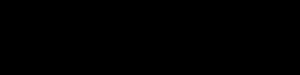

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


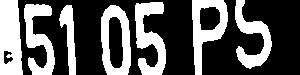

num whites 319
num whites 178


num whites 176


num whites 205


num whites 198


num whites 165


num whites 146


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


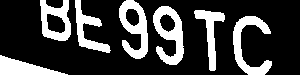

num whites 201


num whites 197


num whites 119


num whites 174


num whites 169


num whites 120


num whites 138


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


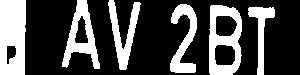

num whites 357
num whites 136


num whites 128


num whites 175


num whites 211


num whites 113


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


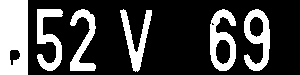

num whites 376
num whites 159


num whites 148


num whites 122


num whites 185


num whites 178


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
-------------------------

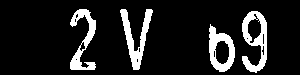

num whites 124


num whites 115


num whites 170


num whites 157


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


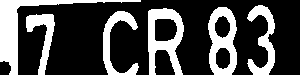

num whites 143


num whites 125


num whites 192


num whites 208


num whites 148


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


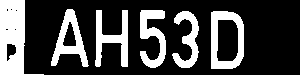

num whites 204


num whites 124


num whites 151


num whites 197


num whites 148


num whites 191


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


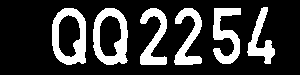

num whites 181


num whites 177


num whites 171


num whites 160


num whites 194


num whites 134


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


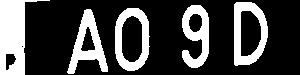

num whites 182


num whites 141


num whites 165


num whites 214


num whites 189


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


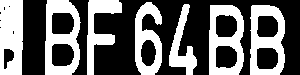

num whites 343
num whites 212


num whites 153


num whites 209


num whites 151


num whites 225


num whites 218


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


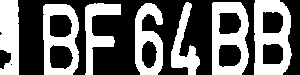

num whites 338
num whites 216


num whites 149


num whites 223


num whites 146


num whites 234


num whites 230


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


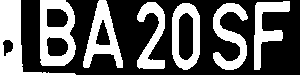

num whites 190


num whites 232


num whites 156


num whites 181


num whites 210


num whites 167


num whites 146


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


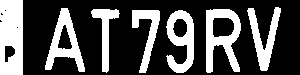

num whites 362
num whites 127


num whites 120


num whites 151


num whites 206


num whites 200


num whites 134


--------------------------------------
--------------------------------------


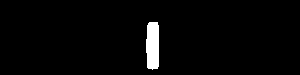

num whites 349
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


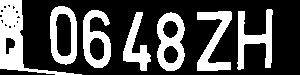

num whites 135


num whites 183


num whites 196


num whites 156


num whites 198


num whites 186


num whites 143


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


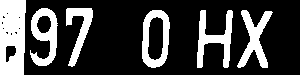

num whites 330
num whites 172


num whites 146


num whites 178


num whites 151


num whites 136


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


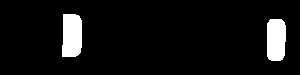

num whites 365
num whites 351
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


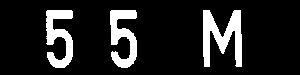

num whites 206


num whites 206


num whites 184


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


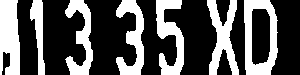

num whites 343
num whites 192


num whites 175


num whites 189


num whites 192


num whites 164


num whites 180


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


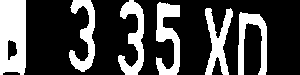

num whites 353
num whites 159


num whites 170


num whites 216


num whites 171


num whites 172


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


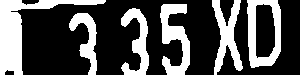

num whites 154


num whites 165


num whites 190


num whites 157


num whites 179


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


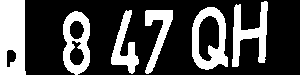

num whites 350
num whites 209


num whites 150


num whites 152


num whites 193


num whites 161


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


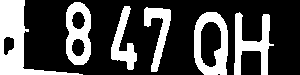

num whites 155


num whites 230


num whites 146


num whites 150


num whites 204


num whites 150


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


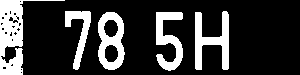

num whites 99


num whites 137


num whites 206


num whites 195


num whites 175


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


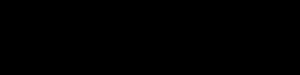

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


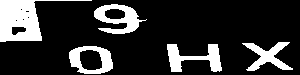

num whites 147


num whites 186


num whites 157


num whites 160


num whites 134


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


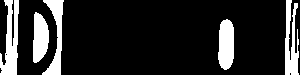

num whites 201


num whites 276


num whites 195


num whites 310
num whites 211


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


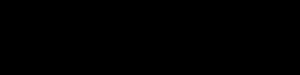

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


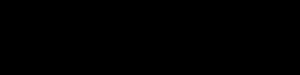

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


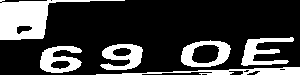

num whites 194


num whites 192


num whites 167


num whites 138


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


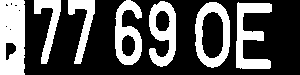

num whites 354
num whites 138


num whites 146


num whites 209


num whites 216


num whites 166


num whites 182


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


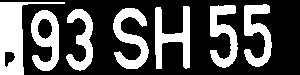

num whites 199


num whites 211


num whites 168


num whites 172


num whites 179


num whites 199


num whites 200


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


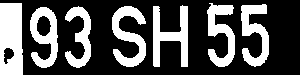

num whites 351
num whites 197


num whites 170


num whites 180


num whites 183


num whites 184


num whites 198


--------------------------------------
--------------------------------------


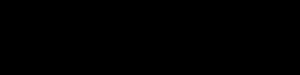

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


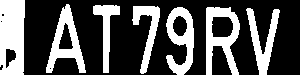

num whites 342
num whites 140


num whites 122


num whites 137


num whites 192


num whites 184


num whites 132


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


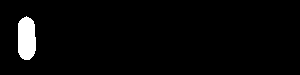

num whites 319
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


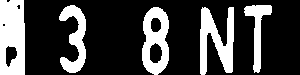

num whites 340
num whites 184


num whites 235


num whites 206


num whites 136


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


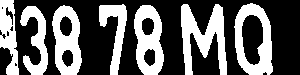

num whites 209


num whites 169


num whites 223


num whites 166


num whites 233


num whites 183


num whites 180


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


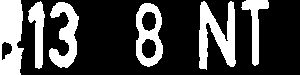

num whites 311
num whites 187


num whites 183


num whites 202


num whites 195


num whites 136


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


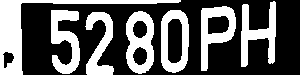

num whites 206


num whites 182


num whites 227


num whites 216


num whites 172


num whites 162


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


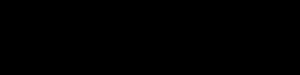

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


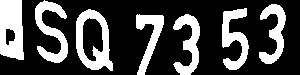

num whites 324
num whites 152


num whites 177


num whites 153


num whites 172


num whites 178


num whites 166


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


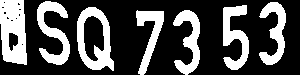

num whites 287
num whites 156


num whites 177


num whites 151


num whites 165


num whites 191


num whites 163


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


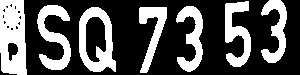

num whites 299
num whites 172


num whites 192


num whites 157


num whites 166


num whites 193


num whites 177


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


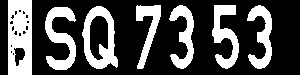

num whites 325
num whites 174


num whites 166


num whites 152


num whites 166


num whites 174


num whites 170


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


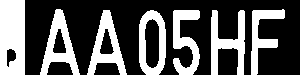

num whites 371
num whites 142


num whites 132


num whites 201


num whites 202


num whites 185


num whites 150


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


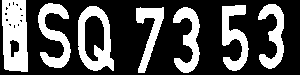

num whites 305
num whites 163


num whites 185


num whites 155


num whites 165


num whites 195


num whites 170


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


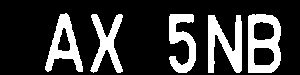

num whites 134


num whites 143


num whites 204


num whites 199


num whites 217


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


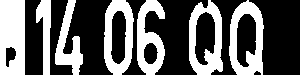

num whites 364
num whites 212


num whites 156


num whites 195


num whites 204


num whites 189


num whites 181


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


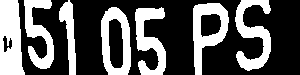

num whites 301
num whites 180


num whites 174


num whites 203


num whites 193


num whites 171


num whites 169


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


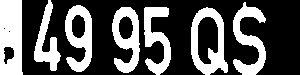

num whites 339
num whites 138


num whites 204


num whites 191


num whites 193


num whites 178


num whites 160


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


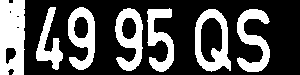

num whites 341
num whites 147


num whites 207


num whites 200


num whites 186


num whites 178


num whites 170


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


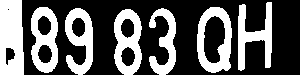

num whites 353
num whites 217


num whites 204


num whites 220


num whites 171


num whites 185


num whites 165


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


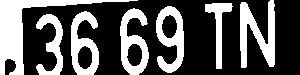

num whites 153


num whites 194


num whites 177


num whites 191


num whites 126


num whites 194


--------------------------------------
--------------------------------------
--------------------------------------


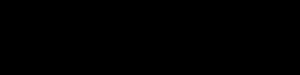

error
--------------------------------------
--------------------------------------
--------------------------------------


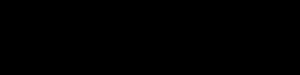

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


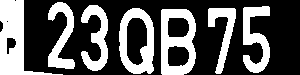

num whites 168


num whites 177


num whites 175


num whites 186


num whites 232


num whites 151


num whites 204


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


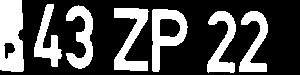

num whites 334
num whites 165


num whites 187


num whites 179


num whites 174


num whites 174


num whites 168


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


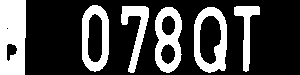

num whites 361
num whites 200


num whites 142


num whites 214


num whites 180


num whites 135


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


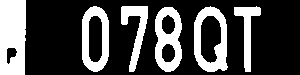

num whites 367
num whites 207


num whites 149


num whites 224


num whites 185


num whites 126


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


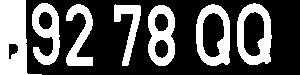

num whites 269


num whites 198


num whites 177


num whites 148


num whites 224


num whites 189


num whites 189


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


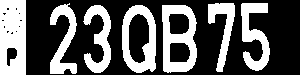

num whites 354
num whites 163


num whites 168


num whites 196


num whites 215


num whites 152


num whites 185


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


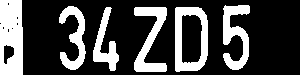

num whites 344
num whites 160


num whites 134


num whites 179


num whites 199


num whites 204


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


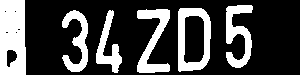

num whites 352
num whites 158


num whites 133


num whites 173


num whites 188


num whites 187


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


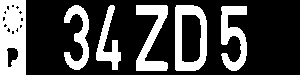

num whites 339
num whites 159


num whites 132


num whites 182


num whites 204


num whites 206


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


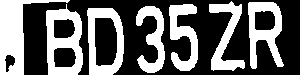

num whites 189


num whites 194


num whites 190


num whites 169


num whites 197


num whites 142


num whites 184


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


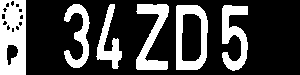

num whites 325
num whites 153


num whites 127


num whites 172


num whites 192


num whites 211


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


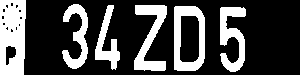

num whites 323
num whites 159


num whites 142


num whites 175


num whites 212


num whites 207


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


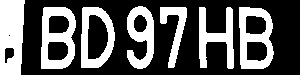

num whites 331
num whites 214


num whites 181


num whites 215


num whites 139


num whites 167


num whites 201


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


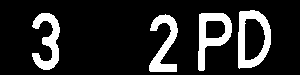

num whites 165


num whites 163


num whites 153


num whites 162


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


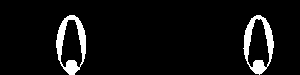

num whites 135


num whites 125


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


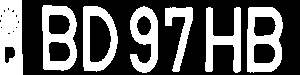

num whites 333
num whites 215


num whites 181


num whites 208


num whites 152


num whites 165


num whites 222


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


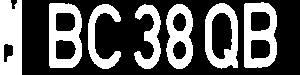

num whites 351
num whites 237


num whites 137


num whites 169


num whites 227


num whites 186


num whites 233


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


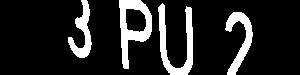

num whites 137


num whites 147


num whites 131


num whites 141


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


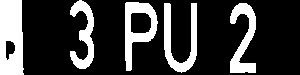

num whites 340
num whites 163


num whites 154


num whites 148


num whites 186


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


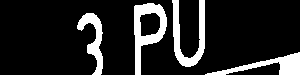

num whites 137


num whites 149


num whites 141


num whites 114


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


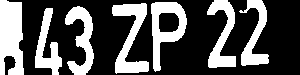

num whites 314
num whites 161


num whites 164


num whites 166


num whites 161


num whites 172


num whites 138


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


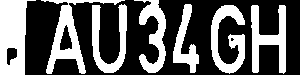

num whites 263


num whites 134


num whites 152


num whites 150


num whites 140


num whites 177


num whites 169


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


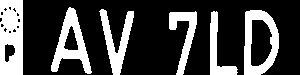

num whites 332
num whites 133


num whites 133


num whites 147


num whites 135


num whites 185


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


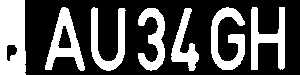

num whites 358
num whites 142


num whites 151


num whites 184


num whites 145


num whites 182


num whites 174


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


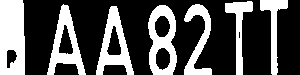

num whites 356
num whites 138


num whites 149


num whites 198


num whites 149


num whites 127


num whites 122


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


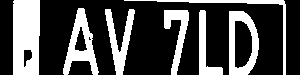

num whites 367
num whites 150


num whites 137


num whites 148


num whites 129


num whites 187


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


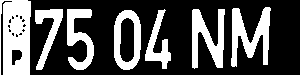

num whites 299
num whites 143


num whites 189


num whites 201


num whites 141


num whites 194


num whites 174


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


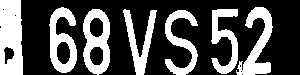

num whites 342
num whites 192


num whites 220


num whites 128


num whites 139


num whites 162


num whites 156


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


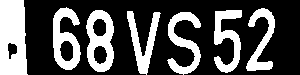

num whites 338
num whites 204


num whites 212


num whites 132


num whites 148


num whites 184


num whites 149


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


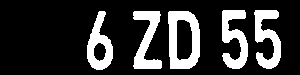

num whites 179


num whites 184


num whites 215


num whites 207


num whites 192


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


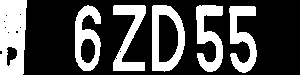

num whites 322
num whites 200


num whites 169


num whites 191


num whites 208


num whites 193


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


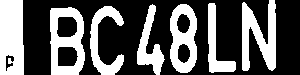

num whites 371
num whites 227


num whites 142


num whites 146


num whites 232


num whites 138


num whites 208


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


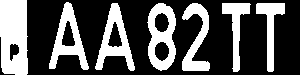

num whites 348
num whites 128


num whites 127


num whites 207


num whites 172


num whites 123


num whites 128


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


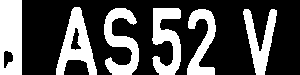

num whites 367
num whites 161


num whites 175


num whites 220


num whites 176


num whites 159


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


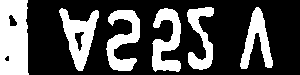

num whites 357
num whites 164


num whites 192


num whites 218


num whites 180


num whites 157


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


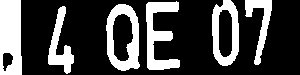

num whites 348
num whites 136


num whites 179


num whites 176


num whites 193


num whites 130


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


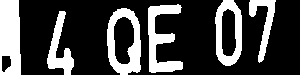

num whites 345
num whites 144


num whites 183


num whites 171


num whites 191


num whites 125


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


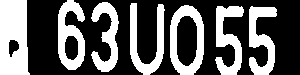

num whites 339
num whites 213


num whites 167


num whites 146


num whites 177


num whites 186


num whites 198


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


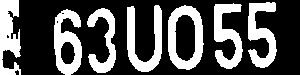

num whites 237


num whites 209


num whites 151


num whites 162


num whites 185


num whites 205


num whites 194


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


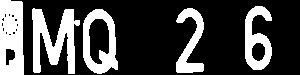

num whites 341
num whites 173


num whites 189


num whites 176


num whites 206


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


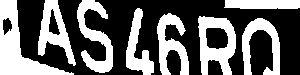

num whites 198


num whites 148


num whites 157


num whites 158


num whites 184


num whites 205


num whites 385
num whites 160


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


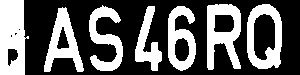

num whites 303
num whites 153


num whites 165


num whites 163


num whites 212


num whites 213


num whites 197


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


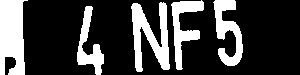

num whites 298
num whites 144


num whites 172


num whites 138


num whites 174


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


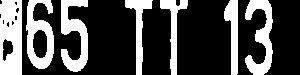

num whites 330
num whites 205


num whites 208


num whites 116


num whites 110


num whites 220


num whites 179


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


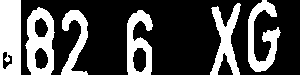

num whites 368
num whites 216


num whites 156


num whites 210


num whites 153


num whites 157


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


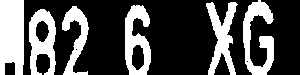

num whites 368
num whites 215


num whites 151


num whites 219


num whites 160


num whites 170


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


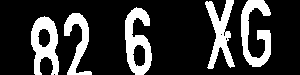

num whites 207


num whites 145


num whites 203


num whites 153


num whites 178


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


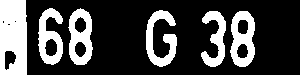

num whites 352
num whites 188


num whites 206


num whites 153


num whites 166


num whites 216


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


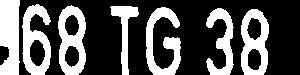

num whites 344
num whites 194


num whites 213


num whites 113


num whites 178


num whites 171


num whites 214


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


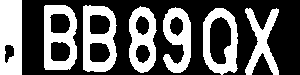

num whites 365
num whites 235


num whites 222


num whites 213


num whites 211


num whites 186


num whites 156


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


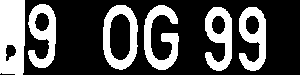

num whites 361
num whites 201


num whites 167


num whites 171


num whites 219


num whites 211


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


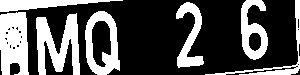

num whites 308
num whites 198


num whites 178


num whites 155


num whites 63


num whites 207


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


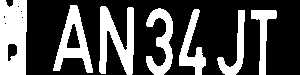

num whites 350
num whites 134


num whites 196


num whites 179


num whites 135


num whites 115


num whites 133


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


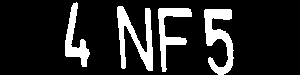

num whites 136


num whites 155


num whites 116


num whites 170


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


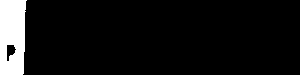

num whites 337
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


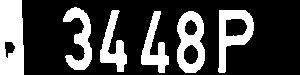

num whites 356
num whites 173


num whites 159


num whites 158


num whites 226


num whites 161


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


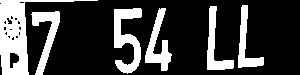

num whites 121


num whites 137


num whites 193


num whites 138


num whites 133


num whites 127


--------------------------------------
--------------------------------------
--------------------------------------


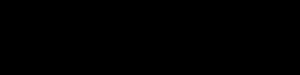

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


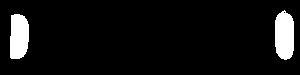

num whites 321
num whites 317
--------------------------------------
--------------------------------------
--------------------------------------


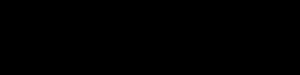

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


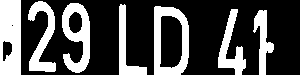

num whites 358
num whites 169


num whites 201


num whites 129


num whites 195


num whites 152


num whites 162


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


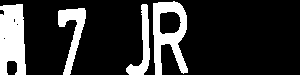

num whites 325
num whites 149


num whites 119


num whites 186


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


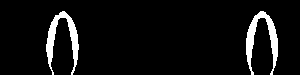

num whites 101


num whites 110


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


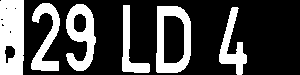

num whites 357
num whites 169


num whites 189


num whites 129


num whites 193


num whites 155


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


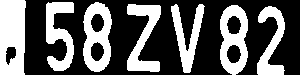

num whites 340
num whites 211


num whites 218


num whites 180


num whites 142


num whites 228


num whites 176


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


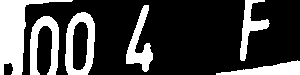

num whites 214


num whites 180


num whites 182


num whites 142


num whites 191


num whites 114


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


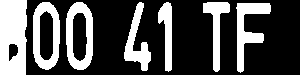

num whites 357
num whites 200


num whites 204


num whites 142


num whites 221


num whites 126


num whites 137


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
-------------------------

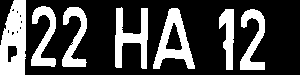

num whites 288
num whites 173


num whites 181


num whites 173


num whites 146


num whites 225


num whites 169


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


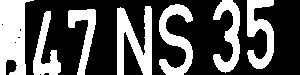

num whites 258


num whites 162


num whites 153


num whites 218


num whites 165


num whites 169


num whites 202


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


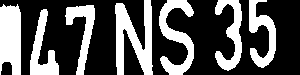

num whites 336
num whites 158


num whites 133


num whites 185


num whites 159


num whites 169


num whites 170


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


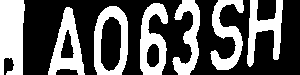

num whites 334
num whites 163


num whites 179


num whites 212


num whites 170


num whites 158


num whites 162


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


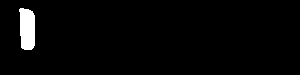

num whites 320
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


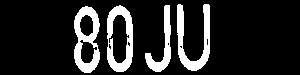

num whites 187


num whites 180


num whites 116


num whites 139


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


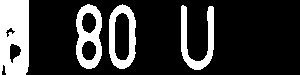

num whites 350
num whites 203


num whites 178


num whites 136


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


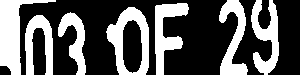

num whites 227


num whites 204


num whites 162


num whites 168


num whites 167


num whites 175


num whites 193


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


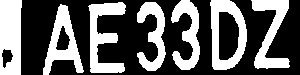

num whites 343
num whites 142


num whites 187


num whites 171


num whites 178


num whites 190


num whites 162


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


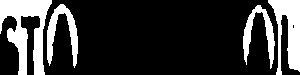

num whites 201


num whites 131


num whites 106


num whites 220


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


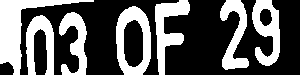

num whites 172


num whites 214


num whites 182


num whites 180


num whites 156


num whites 170


num whites 207


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


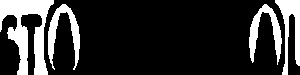

num whites 201


num whites 122


num whites 117


num whites 198


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


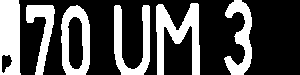

num whites 342
num whites 147


num whites 201


num whites 170


num whites 157


num whites 177


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


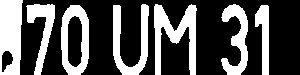

num whites 319
num whites 149


num whites 200


num whites 153


num whites 144


num whites 174


num whites 224


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


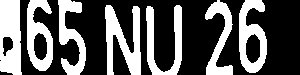

num whites 323
num whites 207


num whites 172


num whites 192


num whites 150


num whites 149


num whites 201


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


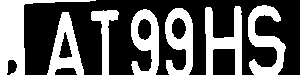

num whites 152


num whites 167


num whites 142


num whites 208


num whites 211


num whites 180


num whites 160


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


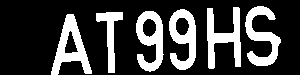

num whites 147


num whites 130


num whites 196


num whites 207


num whites 155


num whites 169


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


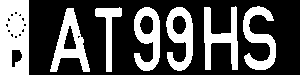

num whites 351
num whites 139


num whites 110


num whites 209


num whites 202


num whites 161


num whites 159


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


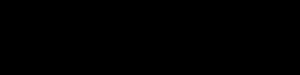

error
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


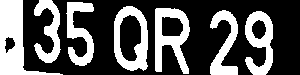

num whites 197


num whites 172


num whites 193


num whites 180


num whites 191


num whites 179


num whites 202


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


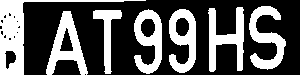

num whites 142


num whites 123


num whites 205


num whites 215


num whites 163


num whites 158


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


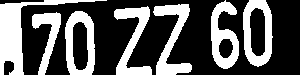

num whites 145


num whites 193


num whites 143


num whites 144


num whites 189


num whites 182


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


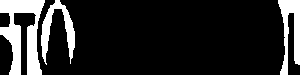

num whites 207


num whites 123


num whites 190


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


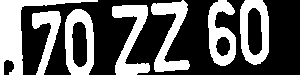

num whites 179


num whites 153


num whites 209


num whites 165


num whites 151


num whites 196


num whites 205


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


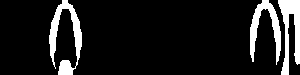

num whites 123


num whites 122


num whites 200


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


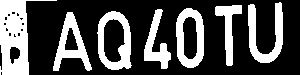

num whites 164


num whites 122


num whites 163


num whites 151


num whites 203


num whites 132


num whites 154


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


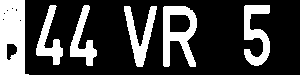

num whites 307
num whites 146


num whites 139


num whites 138


num whites 201


num whites 205


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


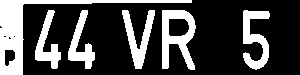

num whites 144


num whites 142


num whites 134


num whites 201


num whites 204


--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


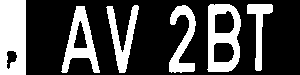

num whites 369
num whites 132


num whites 128


num whites 171


num whites 201


num whites 131


--------------------------------------


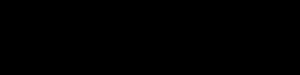

error


In [50]:
crop_num = 0
plate_num = -1


for image in plates_paths:

  plate_num += 1
  img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (300, 75))
  th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  _, labels = cv2.connectedComponents(th)

  mask = np.zeros(th.shape, dtype = 'uint8')

  total_pixels = th.shape[0] * th.shape[1]
  min = total_pixels // 40
  max = total_pixels // 10

  for (j, label) in enumerate(np.unique(labels)):
    if label == 0:
      continue

    label_mask = np.zeros(th.shape, dtype = 'uint8')
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)

    #    cv2_imshow(label_mask)

    if num_pixels > min and num_pixels < max:
      mask = cv2.add(mask, label_mask)
    print("--------------------------------------")
  cv2_imshow(mask)

  cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if cnts:

    (cnts, _) = contours.sort_contours(cnts, method = "left-to-right")

    ep = 0

    for rect in cnts:
      x, y, w, h = cv2.boundingRect(rect)

      if 10 < w < 100 and h < 80:
        crop = mask[y - ep:y + h + ep, x - ep: x + w + ep]
        if crop.shape[0] > 0:
          if crop.shape[1] > 0:
            resized_crop = cv2.resize(crop, (20, 20))

            lines = resized_crop.shape[0]
            columns = resized_crop.shape[1]
            num_whites = 0

            for line in range(lines):
              for column in range(columns):
                if resized_crop[line, column] == 255:
                  num_whites += 1
                else:
                  continue

            print("num whites", num_whites)
            if num_whites / (lines * columns) > 0.70:
              continue
            else:
              cv2_imshow(resized_crop)

              path = r"/content/masks_tests/" + str(plate_num)
              cv2.imwrite(path  + '/' + str(crop_num) + ".png", resized_crop)
              crop_num += 1
  else:
    print("error")




In [51]:
import re
folder_count = 0
dir_masks = "/content/masks_tests/"

mask_folders = glob.glob(os.path.join(dir_masks, "*"))

if not os.path.exists("/content/results.txt"):
        file = open("/content/results.txt", "a")
        print("file created")

with open('results.txt', 'w') as file:
  for folder in mask_folders:

    text = []

    mask_files = glob.glob(os.path.join(folder, "*.png"))

    for mask_file in mask_files:
      mask =  cv2.imread(mask_file)
      cv2_imshow(mask)

      mask = np.expand_dims(mask, axis = 0)

      predict = model_classification.predict(mask)
      class_index = np.argmax(predict)
      text.append(classes[class_index])
      temp = str(text)

      temp = temp.replace(" ", "").replace("'", "").replace(".", "").replace("-", "").replace(";", "").replace(":", "").replace("[", "").replace("]", "").replace(",", "")

    file.write(str(temp) + " " + folder + "\n")
  file.close()


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


In [ ]:
path = r"/content/Licence-plates-identification-4/data.yaml"

model = YOLO("yolov8n.yaml").load("yolov8n.pt")

results = model.train(data = path, epochs = 100)

100%|██████████| 6.23M/6.23M [00:00<00:00, 259MB/s]

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Licence-plates-identification-4/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 157MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Licence-plates-identification-4/train/labels... 312 images, 0 backgrounds, 0 corrupt: 100%|██████████| 312/312 [00:00<00:00, 2112.33it/s]

train: New cache created: /content/Licence-plates-identification-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Licence-plates-identification-4/valid/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 2638.84it/s]

val: New cache created: /content/Licence-plates-identification-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.39G      1.248      3.354      1.185         10        640: 100%|██████████| 20/20 [00:09<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         29         31    0.00356          1      0.428      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.27G     0.9314      1.737     0.9486         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         29         31    0.00322      0.903    0.00833    0.00688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G     0.9216      1.443     0.9293         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         29         31      0.784      0.419      0.749      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.28G     0.8716      1.356     0.9281          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         29         31      0.768       0.71      0.822      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.28G     0.9064      1.239     0.9247         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         29         31      0.909      0.548       0.75      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.28G      0.904      1.122     0.9316         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         29         31     0.0182       0.29     0.0147     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.28G     0.8312      1.058     0.9283         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         29         31      0.139      0.516      0.115     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.28G     0.8324     0.9776     0.9248          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         29         31      0.805      0.935      0.928      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.28G     0.7855     0.8958     0.9115         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         29         31      0.989      0.839      0.935      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.28G     0.8131     0.8146     0.9102         10        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         29         31          1      0.934      0.973      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.28G     0.7723     0.7586     0.8883         14        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         29         31      0.988      0.806      0.937      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.28G     0.8109     0.7185     0.9067         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         29         31          1      0.863      0.978      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.28G     0.7951     0.7252     0.9094         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         29         31      0.937       0.96      0.963      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.28G     0.7945     0.6858     0.9089          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         29         31      0.998      0.968      0.994      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.28G     0.7398     0.6511     0.8832         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         29         31      0.965          1      0.986      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.28G     0.7886     0.6577     0.8885         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         29         31      0.906      0.968      0.961      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.28G     0.7487     0.6315     0.8973         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         29         31      0.997      0.968      0.991      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.28G     0.7677     0.6058     0.8855          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         29         31          1      0.955      0.993      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.28G     0.7554     0.5951      0.893         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         29         31          1      0.965       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.28G     0.7319     0.5592     0.8813         18        640: 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         29         31          1      0.997      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.28G      0.692     0.5306      0.881         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         29         31      0.969          1      0.992      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.28G     0.7067     0.5443     0.8712          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         29         31      0.968      0.991      0.993       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.28G      0.665     0.5061     0.8619         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         29         31      0.966      0.904      0.989      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.28G     0.6819     0.5113     0.8753          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         29         31      0.979      0.935      0.985       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.28G     0.6704     0.5095     0.8786         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         29         31      0.962      0.935      0.985      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.28G     0.6641     0.5041      0.872         17        640: 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         29         31      0.891      0.871       0.89      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.28G     0.6736      0.495     0.8713          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         29         31      0.963      0.935       0.96      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.28G     0.6517     0.4944     0.8665         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         29         31          1      0.967      0.994      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.28G     0.6716     0.4908      0.872         18        640: 100%|██████████| 20/20 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         29         31          1      0.997      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.28G     0.6051     0.4562     0.8573          7        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         29         31          1      0.997      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.28G     0.6426     0.4643     0.8571         20        640: 100%|██████████| 20/20 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         29         31      0.996      0.968      0.993      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.28G      0.617     0.4508     0.8588         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         29         31      0.966      0.918      0.975      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.28G      0.659     0.4672     0.8728         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         29         31      0.985      0.968      0.993      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.28G     0.6686     0.4518     0.8651         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         29         31      0.939      0.992      0.962      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.28G     0.6713     0.4616     0.8721         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         29         31          1      0.929      0.987       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.28G     0.6402     0.4739     0.8748         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         29         31      0.924      0.968      0.984      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.28G     0.6426     0.4631     0.8724          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         29         31      0.966          1      0.994      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.28G     0.6401     0.4614     0.8652         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         29         31      0.962          1      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.28G     0.6044     0.4387     0.8541         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         29         31          1      0.965      0.987      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.28G     0.6329     0.4679     0.8563         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         29         31      0.966       0.91      0.985      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.28G     0.5994     0.4331     0.8518         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         29         31      0.964          1      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.28G     0.5898     0.4318     0.8548         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         29         31          1      0.964      0.994      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.28G     0.5661     0.4055     0.8404         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         29         31      0.968      0.965      0.992       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.28G     0.6008     0.4289      0.858         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         29         31      0.996      0.935      0.991      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.28G     0.5901     0.4285     0.8777         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         29         31      0.956      0.935      0.986      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.28G     0.5603     0.4042     0.8432          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         29         31          1      0.932      0.981      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G     0.5755     0.4088     0.8479          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         29         31      0.999          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.28G     0.5479     0.3993     0.8325         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         29         31      0.969      0.997      0.994      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.28G     0.5634     0.4016     0.8459         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         29         31       0.95          1      0.993        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.28G     0.5382     0.3901     0.8362          7        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         29         31      0.935          1      0.989      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.28G     0.5839     0.4022     0.8323         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         29         31      0.939      0.999       0.99      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.28G      0.602     0.4105     0.8553          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         29         31          1      0.964      0.994      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.28G     0.5626     0.3975     0.8357          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         29         31      0.936          1      0.992      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.28G     0.5608     0.3952     0.8375         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         29         31      0.868      0.871      0.954      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.28G     0.5187     0.3914       0.85         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         29         31      0.936      0.949      0.988      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.28G     0.5215     0.3755      0.856          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         29         31      0.965      0.968       0.99      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.28G     0.5129      0.362     0.8377         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         29         31          1      0.966      0.993      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.28G     0.5192      0.375     0.8402         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         29         31      0.966          1      0.994      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.28G     0.4937     0.3671     0.8394         16        640: 100%|██████████| 20/20 [00:06<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         29         31      0.966          1      0.994      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.28G     0.5053     0.3665     0.8332          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         29         31      0.992      0.968      0.993      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.28G     0.5014     0.3596     0.8317          7        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         29         31      0.998      0.968      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.28G     0.5423     0.3787     0.8458          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         29         31      0.995          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.28G     0.4875     0.3592     0.8347         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         29         31          1      0.996      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G     0.4825     0.3528     0.8374         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         29         31      0.997      0.968      0.994      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.28G     0.4787     0.3529     0.8405         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         29         31      0.968          1      0.993      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.28G     0.4833     0.3485     0.8399         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         29         31      0.969      0.996      0.993      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.28G     0.4734     0.3481     0.8297         17        640: 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         29         31          1       0.93      0.991      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G     0.4612     0.3363     0.8337         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         29         31      0.987      0.903      0.984      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.28G     0.4665     0.3376     0.8255         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         29         31      0.964      0.968      0.988      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.28G     0.4737     0.3435     0.8283          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         29         31      0.963      0.968      0.985      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.28G     0.4753       0.34     0.8335         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         29         31      0.966      0.968       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.28G     0.4201     0.3187     0.8221         14        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         29         31      0.983      0.968      0.993      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.28G     0.4269     0.3141     0.8251         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         29         31      0.969      0.999      0.993      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G     0.4227     0.3209      0.821         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         29         31      0.969      0.998      0.994      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.28G      0.445     0.3258     0.8174         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         29         31      0.965      0.968       0.98      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G     0.4228     0.3218       0.82         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         29         31      0.966      0.968      0.992       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.28G     0.4172     0.3174     0.8231         16        640: 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         29         31      0.965          1      0.993      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.28G     0.4369     0.3174     0.8229          5        640: 100%|██████████| 20/20 [00:05<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         29         31      0.998      0.968      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.28G     0.4285      0.316     0.8214          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         29         31      0.991      0.968      0.993      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.28G     0.4127     0.3195     0.8214         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         29         31      0.969      0.996      0.994      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.28G     0.4002     0.2988     0.8204         11        640: 100%|██████████| 20/20 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         29         31      0.996      0.968      0.994      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.28G     0.3894     0.3022     0.8158          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         29         31      0.998      0.968      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.28G      0.374     0.2888     0.8227          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         29         31          1      0.964      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G     0.4135     0.3089     0.8205         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         29         31      0.997      0.968      0.992      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.28G      0.381     0.2979      0.817          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         29         31      0.998      0.968      0.993       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G     0.3839     0.2875     0.8259         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         29         31          1      0.968      0.994      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.28G     0.3824     0.2911      0.813         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         29         31          1      0.996      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.28G     0.3667     0.2814      0.814         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         29         31          1      0.998      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.28G     0.3764     0.2854     0.8161         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         29         31          1      0.997      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.28G     0.3744     0.2846     0.8166         11        640: 100%|██████████| 20/20 [00:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         29         31      0.999      0.968      0.992      0.822


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.41G     0.3266     0.2551     0.7851          8        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         29         31          1      0.967      0.993      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.28G     0.3142       0.25     0.7872          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         29         31          1      0.966      0.993      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.28G     0.3191      0.249     0.7879          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         29         31          1      0.966      0.992      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.28G     0.3198     0.2424     0.7992          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         29         31      0.997      0.935      0.991       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.28G     0.2975     0.2402      0.778          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         29         31          1      0.967      0.992      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.28G     0.3064     0.2407     0.7827          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         29         31          1      0.995      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.28G     0.3021      0.239      0.778          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         29         31          1      0.996      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.28G     0.3191     0.2411     0.7884          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         29         31          1      0.997      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.28G     0.3027     0.2388     0.7978          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         29         31          1      0.998      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.28G      0.287     0.2315     0.7987          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         29         31          1      0.997      0.995      0.822



100 epochs completed in 0.200 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]


                   all         29         31          1      0.997      0.995      0.841
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
counter = 0
for image in final_image_paths:

  image_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

  if not os.path.exists("/content/final_images_gray/"):
        os.makedirs("/content/final_images_gray/")
        print("folder created")

  cv2.imwrite("/content/final_images_gray/" + str(counter) + ".jpg", image_gray)

  counter = counter + 1

In [ ]:
dir_final_images_gray = "/content/final_images_gray/*.jpg"
final_images_gray_paths = []

for image in sorted(glob.iglob(dir_final_images_gray)):
  final_images_gray_paths.append(image)

final_images_gray_paths

In [ ]:
counter = 0

for image in final_images_gray_paths:

  img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

  img_blur = cv2.GaussianBlur(img, (5, 5), 0)

  _, th = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  if not os.path.exists("/content/final_images_otsu/"):
        os.makedirs("/content/final_images_otsu/")
        print("folder created")

  cv2.imwrite("/content/final_images_otsu/" + str(counter) + ".jpg", th)

  counter = counter + 1


In [ ]:
dir_final_images_otsu = "/content/final_images_otsu/*.jpg"
final_images_otsu_paths = []

for image in sorted(glob.iglob(dir_final_images_otsu)):
  final_images_otsu_paths.append(image)

final_images_otsu_paths


num_blacks = 0
num_whites = 0
counter = 0

for image in final_images_otsu_paths:

  image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

  height = image.shape[0]
  width = image.shape[1]

  for line in range(height):

    for column in range(width):

      if image[line, column] < 128:
        #image[line, column] = 0
        num_blacks = num_blacks + 1

      elif image[line, column] >= 128:
        #image[line, column] = 255
        num_whites = num_whites + 1
      else:
        print("error")

  if(num_whites > num_blacks):
    image = 255 - image
    cv2.imwrite("/content/final_images_otsu/" + str(counter) + ".jpg", image)

  image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, (3, 3))

  if not os.path.exists("/content/final_images_open/"):
        os.makedirs("/content/final_images_open/")
        print("folder created")

  cv2.resize(image_open, (300, 75))

  cv2.imwrite("/content/final_images_open/" + str(counter) + ".jpg", image_open)

  print("\nNumber of blacks: " + str(num_blacks))
  print("\nNumber of whites: " + str(num_whites))
  cv2_imshow(image_open)

  counter = counter + 1

  _, labels = cv2.connectedComponents(image_open)

  mask = np.zeros(image_open.shape, dtype = 'uint8')

  total_pixels = image_open.shape[0] * image_open.shape[1]
  min = total_pixels // 75
  max = total_pixels // 5

  for (j, label) in enumerate(np.unique(labels)):
    if label == 0:
      continue

    label_mask = np.zeros(image_open.shape, dtype = 'uint8')
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)

    cv2_imshow(label_mask)

    if num_pixels > min and num_pixels < max:
      mask = cv2.add(mask, label_mask)
    print("--------------------------------------")

test = image_open